In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import joblib

In [2]:
income_dataset = pd.read_csv(r'./census_income.csv')
income_dataset.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA for Continious Coloums

In [4]:
income_dataset[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

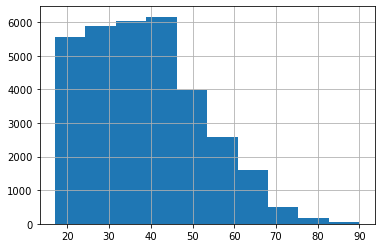

In [8]:
income_dataset['Age'].hist(bins=10)

<AxesSubplot:>

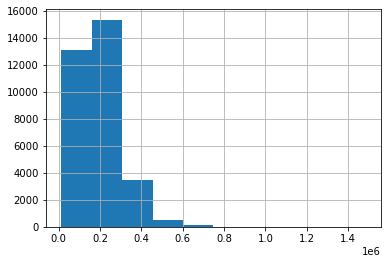

In [9]:
income_dataset['Fnlwgt'].hist(bins=10)

# Check NULL value

In [10]:
income_dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# unique value counts

In [7]:
income_dataset['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [12]:
income_dataset['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [13]:
income_dataset['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
income_dataset['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
income_dataset['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
income_dataset['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
income_dataset['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [18]:
income_dataset['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
income_dataset['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

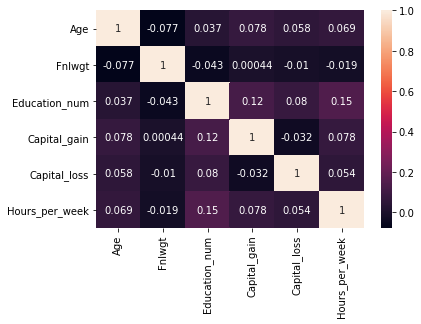

In [21]:
corrMatrix = income_dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [22]:
income_dataset['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [ ]:
### Education_num and Education are corlateated . have same frquency count
### Preschool = 1, 1st-4th =2 

In [5]:
income_dataset = income_dataset.drop(["Education_num"],axis=1)

### replace no data

In [10]:
income_dataset['Workclass'] = income_dataset['Workclass'].str.replace('\?','Other',regex = True)
income_dataset['Occupation'] = income_dataset['Occupation'].str.replace('\?','Other',regex = True)
income_dataset['Native_country'] = income_dataset['Native_country'].str.replace('\?','Other',regex = True)



In [11]:
income_dataset['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Other                1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

### nomalization of continious columns

In [16]:
sc = StandardScaler()
continious_col = ['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']
sc.fit(income_dataset[continious_col])

income_dataset[continious_col] = sc.transform(income_dataset[continious_col])

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Keshav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


# one hot encoding

In [44]:
one_hot_encoding_features = ["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country"]

In [45]:
new_load_dataset = pd.get_dummies(income_dataset, columns = one_hot_encoding_features)
new_load_dataset.head(5)

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,0,0,13,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Label encoder

In [46]:
le = preprocessing.LabelEncoder()
new_load_dataset['Income'] = le.fit_transform(new_load_dataset.Income.values)


In [47]:
new_load_dataset['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [48]:
new_load_dataset.head(5)

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Machine Learning Model

In [49]:
### dived datat into depended and indepedent features
X = new_load_dataset.drop(["Income"], axis=1)
Y = new_load_dataset["Income"]

In [50]:
### split the data into train(80%) & test (20%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [51]:
### intitilze LR model
lr=LogisticRegression(max_iter=500)

### fit the LR model on train dataset
lr.fit(X_train,Y_train)


### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=lr.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=lr.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model performance on train data

Confusion matrix for train data
[[19108   654]
 [ 4617  1669]]
Classification Report for train data
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     19762
           1       0.72      0.27      0.39      6286

   micro avg       0.80      0.80      0.80     26048
   macro avg       0.76      0.62      0.63     26048
weighted avg       0.78      0.80      0.76     26048

accuracy score for train data:79.76%



model performance on test data

Confusion matrix for test data
[[4794  163]
 [1157  398]]
Classification Report for test data
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4957
           1       0.71      0.26      0.38      1555

   micro avg       0.80      0.80      0.80      6512
   macro avg       0.76      0.61      0.63      6512
weighted avg       0.78      0.80      0.76      6512

accuracy score for test data:79.73%


# Rando Forest

In [52]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'n_estimators': [10,30,70,100]
}

rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 2)

grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.8s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.7s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   42.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15], 'n_estimators': [10, 30, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [53]:
print("best model parameter")
print(grid_search.best_estimator_)

### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=grid_search.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=grid_search.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

best model parameter
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model performance on train data

Confusion matrix for train data
[[19172   590]
 [ 2299  3987]]
Classification Report for train data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19762
           1       0.87      0.63      0.73      6286

   micro avg       0.89      0.89      0.89     26048
   macro avg       0.88      0.80      0.83     26048
weighted avg       0.89      0.89      0.88     26048

accuracy score for train data:88.91%



model performance on test data

Confusion matrix for tes

# Both Model are not performing well

### working for Data Cleaning

In [21]:
income_dataset_copy = income_dataset.copy()
income_dataset_copy

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837097,Self-emp-not-inc,-1.008742,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145914,-0.216663,-2.222120,United-States,<=50K
1,-0.042640,Private,0.245046,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145914,-0.216663,-0.035430,United-States,<=50K
2,1.057031,Private,0.425770,SR Sec School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145914,-0.216663,-0.035430,United-States,<=50K
3,-0.775755,Private,1.408146,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145914,-0.216663,-0.035430,Cuba,<=50K
4,-0.115952,Private,0.898170,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.145914,-0.216663,-0.035430,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,Private,0.639710,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145914,-0.216663,-0.197407,United-States,<=50K
32556,0.103982,Private,-0.335466,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145914,-0.216663,-0.035430,United-States,>50K
32557,1.423589,Private,-0.358811,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,-0.145914,-0.216663,-0.035430,United-States,<=50K
32558,-1.215624,Private,0.110927,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,-0.145914,-0.216663,-1.655200,United-States,<=50K


In [22]:
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('Preschool','Till Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('1st-4th','Till Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('5th-6th','Till Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('7th-8th','Till Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('9th','Till Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('10th','Till Sec School',regex = True)


income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('11th','SR Sec School',regex = True)
income_dataset_copy['Education'] = income_dataset_copy['Education'].str.replace('12th','SR Sec School',regex = True)




In [23]:
income_dataset_copy['Marital_status'] = income_dataset_copy['Marital_status'].str.replace('Married-AF-spouse','Married',regex = True)
income_dataset_copy['Marital_status'] = income_dataset_copy['Marital_status'].str.replace('Married-civ-spouse','Married',regex = True)
income_dataset_copy['Marital_status'] = income_dataset_copy['Marital_status'].str.replace('Married-spouse-absent','Married',regex = True)

# after data cleaning perform ML model

In [24]:
one_hot_encoding_features = ["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country"]
new_load_dataset = pd.get_dummies(income_dataset_copy, columns = one_hot_encoding_features)
new_load_dataset.head(5)

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Other,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.837097,-1.008742,-0.145914,-0.216663,-2.22212,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042640,0.245046,-0.145914,-0.216663,-0.03543,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.057031,0.425770,-0.145914,-0.216663,-0.03543,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.775755,1.408146,-0.145914,-0.216663,-0.03543,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.115952,0.898170,-0.145914,-0.216663,-0.03543,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
le = preprocessing.LabelEncoder()
new_load_dataset['Income'] = le.fit_transform(new_load_dataset.Income.values)


In [26]:
### dived datat into depended and indepedent features
X = new_load_dataset.drop(["Income"], axis=1)
Y = new_load_dataset["Income"]

In [27]:
### split the data into train(80%) & test (20%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [28]:
### intitilze LR model
lr=LogisticRegression(max_iter=500)

### fit the LR model on train dataset
lr.fit(X_train,Y_train)


### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=lr.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=lr.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model performance on train data

Confusion matrix for train data
[[18425  1337]
 [ 2473  3813]]
Classification Report for train data
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19762
           1       0.74      0.61      0.67      6286

   micro avg       0.85      0.85      0.85     26048
   macro avg       0.81      0.77      0.79     26048
weighted avg       0.85      0.85      0.85     26048

accuracy score for train data:85.37%



model performance on test data

Confusion matrix for test data
[[4622  335]
 [ 631  924]]
Classification Report for test data
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4957
           1       0.73      0.59      0.66      1555

   micro avg       0.85      0.85      0.85      6512
   macro avg       0.81      0.76      0.78      6512
weighted avg       0.85      0.85      0.85      6512

accuracy score for test data:85.17%


# Rando Forest

In [29]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'n_estimators': [10,30,70,100]
}

rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 2)

grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.3s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.7s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.7s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   40.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15], 'n_estimators': [10, 30, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [30]:
print("best model parameter")
print(grid_search.best_estimator_)

### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=grid_search.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=grid_search.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

best model parameter
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model performance on train data

Confusion matrix for train data
[[19111   651]
 [ 2287  3999]]
Classification Report for train data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19762
           1       0.86      0.64      0.73      6286

   micro avg       0.89      0.89      0.89     26048
   macro avg       0.88      0.80      0.83     26048
weighted avg       0.89      0.89      0.88     26048

accuracy score for train data:88.72%



model performance on test data

Confusion matrix for tes

### after cleaning both model have same f1-score 